In [9]:
from pathlib import Path
from datamodule import WUSUSegmentationDataModule
from lightning.pytorch import seed_everything
import torch
import os
import matplotlib.pyplot as plt

Seed set to 42


INFO: merge delle classi 'building' e 'water' abilitato
Image shape: torch.Size([4, 512, 512]), Mask shape: torch.Size([512, 512])


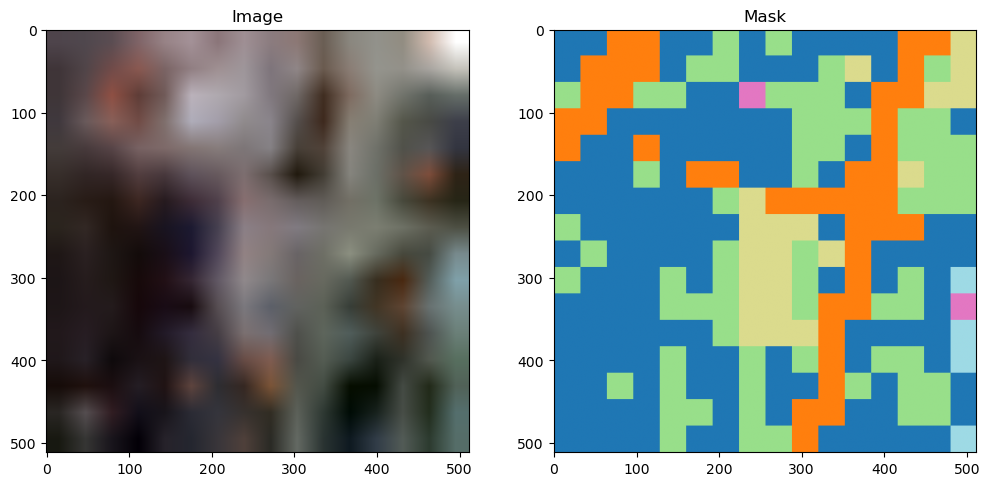

In [182]:
seed_everything(42, workers=True) # per riproducibilità
IN_CHANNELS=4
MERGE_CLASSES = True
REPO_ROOT = Path(os.getcwd()).parent
DATA_ROOT = REPO_ROOT / "data" / "WUSU_preprocessed"
CLASS_MAPPING_PATH = REPO_ROOT / "data" / "OpenWUSU512" / "class_mapping.json"
TARGET_GSD = 32 # espressa in metri
datamodule = WUSUSegmentationDataModule(data_root=DATA_ROOT, class_mapping_path=CLASS_MAPPING_PATH, in_channels=IN_CHANNELS, batch_size=2, num_workers=4, merge_classes=MERGE_CLASSES, target_gsd=TARGET_GSD)
datamodule.setup()
train_dataset = datamodule.train_dataset
dictionary = train_dataset.__getitem__(0)
img, mask = dictionary["image"], dictionary["mask"]
print(f"Image shape: {img.shape}, Mask shape: {mask.shape}")
fig, ax = plt.subplots(1, 2 , figsize=(12,6))
rgb_image = img[:3, :, :].permute(1,2,0).numpy()
rgb_image = (rgb_image - rgb_image.min(axis=(0,1), keepdims=True)) / (rgb_image.max(axis=(0,1), keepdims=True) - rgb_image.min(axis=(0,1), keepdims=True))
ax[0].imshow(rgb_image)
ax[0].set_title("Image")
ax[1].imshow(mask, cmap='tab20')
ax[1].set_title("Mask")
plt.show()

Image shape: torch.Size([4, 512, 512]), Mask shape: torch.Size([512, 512])


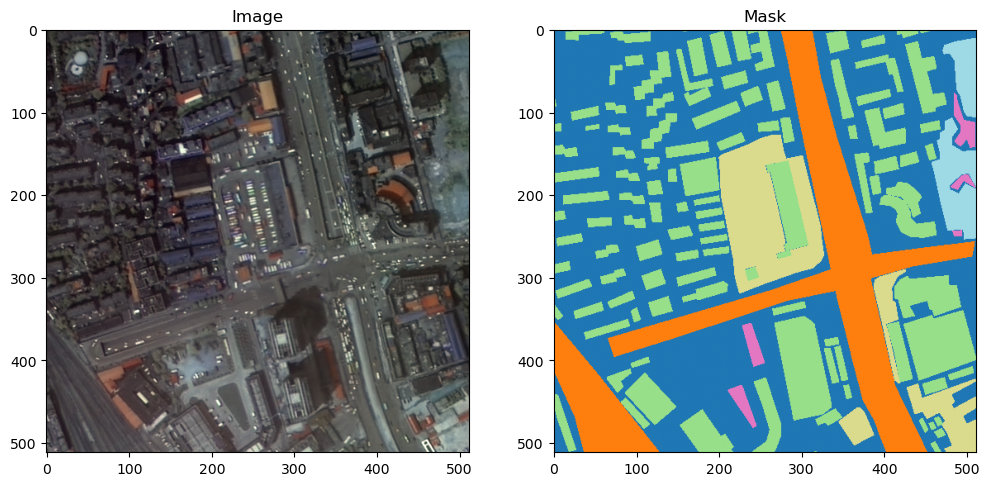

Image shape: torch.Size([4, 512, 512]), Mask shape: torch.Size([512, 512])


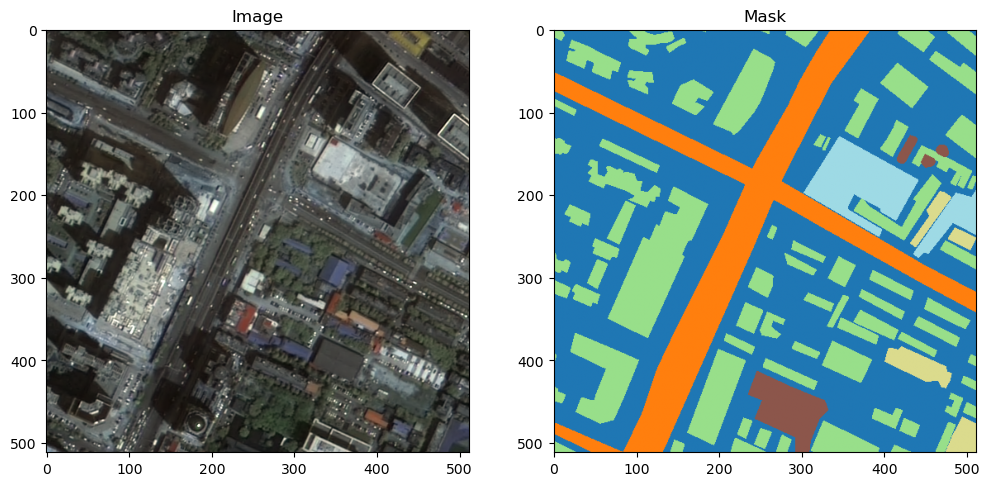

In [ ]:

img, mask = val_dataset.__getitem__(1)["image"], val_dataset.__getitem__(1)["mask"]
print(f"Image shape: {img.shape}, Mask shape: {mask.shape}")

fig, ax = plt.subplots(1, 2 , figsize=(12,6))
rgb_image = img[:3, :, :].permute(1, 2, 0).numpy()
rgb_min = rgb_image.min(axis=(0,1), keepdims=True)
rgb_max = rgb_image.max(axis=(0,1), keepdims=True)
rgb_image = (rgb_image - rgb_min) / (rgb_max - rgb_min)
ax[0].imshow(rgb_image)
ax[0].set_title("Image")
ax[1].imshow(mask, cmap='tab20')
ax[1].set_title("Mask")
plt.show()